# Prototyping an automatic well tie

## Outline

1. Building a Synthetic Well Log
1. Generating Synthetic Seismic trace
1. Generating Synthetic using portion of Synthetic Well
1. Dynamic Time Warping (DTW) for automatic well ties

This notebook will explore building a synthetic well log of alternating lithology units, namely shale and sand.

The synthetic well log will be convolved with a wavetlet and then will have random noise added.  This will be our synthetic seismic trace.

The we will then use only a portion of the synthetic well to simulate the portion recorded by wireline logging.  This will be used to create a synthetic for seismic-to-well tie purposes.

We will then explore using dtw-python to create an automatic well tie.

A portion of code from a 2017 SEG Tutorial on [Seismic Rock Physics](https://github.com/seg/tutorials-2017/blob/master/1706_Seismic_rock_physics/seismic_rock_physics.ipynb) will help guide some of the work to build a synthetic well.

## Library Imports

In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

rng = np.random.RandomState(seed=42)

from bruges.filters import ricker
from bruges.reflection import shuey2

## Roadmap

Let's lay out the roadmap for this project:

1. Create the synthetic sample of the earth:
    - Generate a random sequence of 0's and 1's where 0 represents shale and 1 represents sand.
    - Assign rock properties (Vp, Vs, Rhob) for shale and sand lithology


2. Build an impedance model from the synthetic sample of the earth.

1. Make a subsample of the synthetic sample to use as the wireline log and create a synthetic


## 1. Create the synthetic sample of the earth

Begin by creating a random sequence of 0's and 1's of n samples to represent alternating lithologic layers

In [3]:
n_samples = 2000
lith_sequence = rng.randint(low=0, high=2, size=n_samples)

In [5]:
lith_sequence

array([0, 1, 0, ..., 0, 0, 0])

Make a plot of lith_sequence colored by the value of lith_sequence

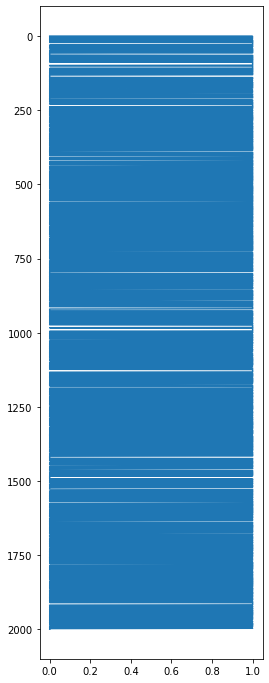

In [18]:
fig = plt.figure(figsize=(4,12))

ax = fig.add_subplot(1,1,1)
ax.plot(lith_sequence, range(0,n_samples))
ax.invert_yaxis()

plt.show()

Zoom in on the first 100 values

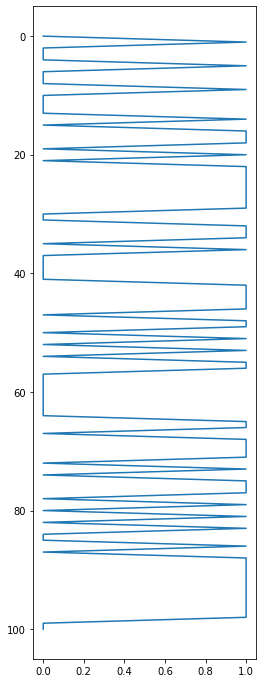

In [20]:
fig = plt.figure(figsize=(4,12))
ax = fig.add_subplot(1,1,1)
ax.plot(lith_sequence[0:101], range(0,101))
ax.invert_yaxis()
plt.show()

In [27]:
earth = np.array([lith_sequence]*100)

In [28]:
earth

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

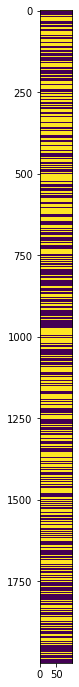

In [30]:
fig = plt.figure(figsize=(4,12))
ax = fig.add_subplot(1,1,1)
ax.imshow(earth.T)
plt.show()